<a href="https://colab.research.google.com/github/sgcortes/UrbanAccessibility/blob/main/ConectarWMSdescargarTeselas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install owslib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.1/221.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Importando las bibliotecas necesarias
from owslib.wms import WebMapService
import matplotlib.pyplot as plt
import requests
import io
from PIL import Image
import os


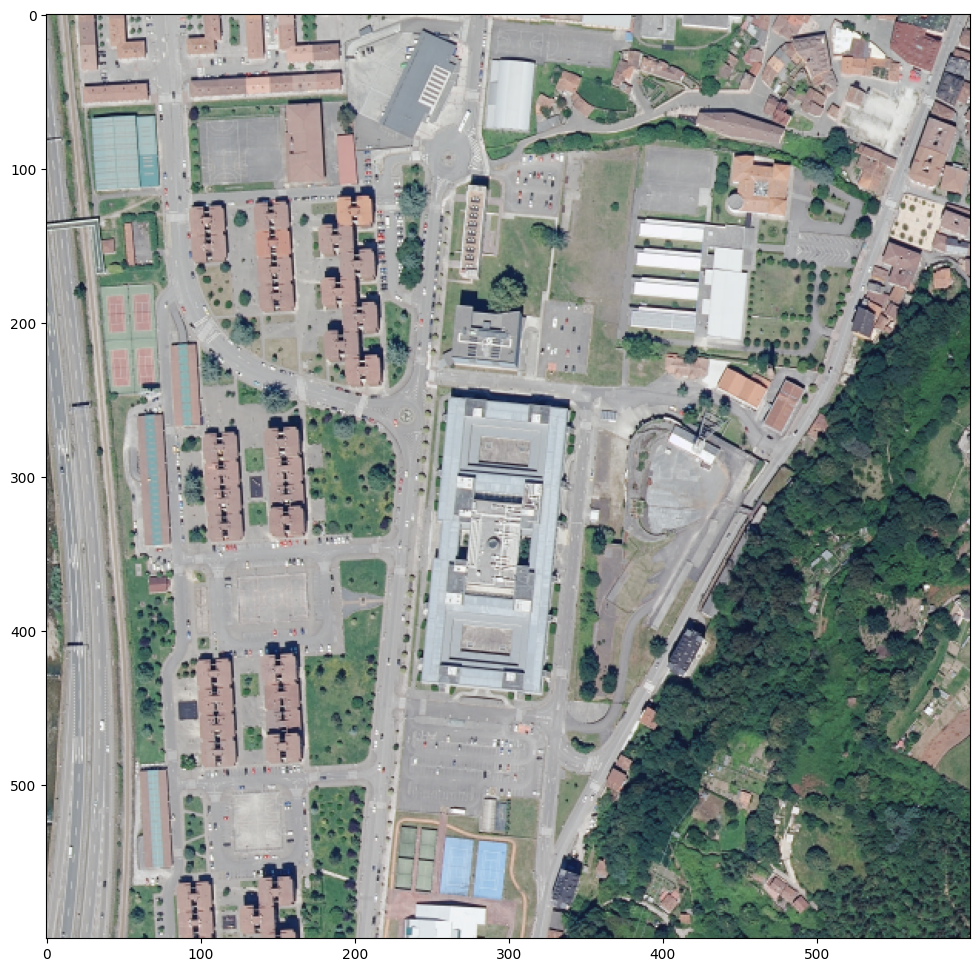

In [ ]:

# Conectarse al servicio WMS
url = 'http://www.ign.es/wms-inspire/pnoa-ma?SERVICE=WMS'  #  URL de la WMS
wms = WebMapService(url)

# Obtener el nombre del primer layer del WMS
layer = list(wms.contents)[1]

bbox = (274300, 4791200, 274900, 4791800)
response = wms.getmap(layers=[layer],
                              styles=['default'],
                              srs='EPSG:25830',
                              bbox= bbox,
                              size=(600, 600),
                              format='image/png',
                              transparent=True)
# Leer la imagen en memoria
image = Image.open(io.BytesIO(response.read()))

# Visualizar la imagen con matplotlib
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.show()

In [ ]:
# Definir los límites del área que quieres visualizar y descargar
# En el orden: (minx, miny, maxx, maxy)
bbox = (274300, 4791200, 274900, 4791800)  # reemplace esto con las coordenadas que desea

# Definir el tamaño de las teselas
tile_size = 100  # este valor dependerá de la resolución de tu mapa

# Calcular el número de filas y columnas
n_rows = int((bbox[3] - bbox[1]) / tile_size)
n_cols = int((bbox[2] - bbox[0]) / tile_size)

# Definir el nombre del directorio en el que se almacenarán las teselas
output_dir = 'Imagenes\TESELAS_WMS'  # reemplace esto con el nombre de su directorio

# Crear el directorio si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Descargar y guardar cada tesela
for row in range(n_rows):
    for col in range(n_cols):
        # Calcular los límites de esta tesela
        minx = bbox[0] + col * tile_size
        maxx = minx + tile_size
        miny = bbox[3] - (row + 1) * tile_size
        maxy = miny + tile_size
        tile_bbox = (minx, miny, maxx, maxy)

        # Solicitar una imagen del WMS
        response = wms.getmap(layers=[layer],
                              styles=['default'],
                              srs='EPSG:25830',
                              bbox=tile_bbox,
                              size=(500, 500),
                              format='image/png',
                              transparent=True)

        # Leer la imagen en memoria
        image = Image.open(io.BytesIO(response.read()))

        # Guardar la tesela de mapa al disco local en el directorio especificado
        image_filename = os.path.join(output_dir, f'tesela_mapa_row{row}_col{col}.png')
        image.save(image_filename)

        print(f"Se ha guardado la imagen en {image_filename}")



Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row0_col0.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row0_col1.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row0_col2.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row0_col3.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row0_col4.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row0_col5.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row1_col0.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row1_col1.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row1_col2.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row1_col3.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row1_col4.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row1_col5.png
Se ha guardado la imagen en Imagenes\TESELAS_WMS/tesela_mapa_row2_col0.png
Se ha guardado la imagen 